<a href="https://www.kaggle.com/code/ellekayem/data-visualization-with-halloween-candies?scriptVersionId=128372155" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Visualization with Halloween Candies

### Analysis by Lauren Main

### Feature Tasks Version 1.0

Using two datasets load and analyze the data.

Summarize your insights. 

Visualize your insights with at least two illustrations per set. 

Table of Contents: 

* [First Look at 'The Ultimate Halloween Candy Power Ranking'](#section-one)
* [First Visualization of the Data](#section-two)
* [Additional Analysis](#section-three)
* [Which type of candy has higher sugar content? ](#section-four)
* [Welcome to Flavor Town!](#section-five)
* [What are the top 10 Halloween candies?  ](#section-six)


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="section-one"></a>
## First Look 'The Ultimate Halloween Candy Power Ranking'

After loading the dataset, I see that there are many binary variables, with 13 different columns overall, as indicated via the introduction.

Note on this dataset: Data was collecting via a website where participants were shown two fun-sized candies and asked to click on their preference. More than 269,000 votes were collected from 8,371 different IP addresses. 

In the competitor name, there were some possessive names with an escaped character instead of the '. I have cleaned the dataset, by removing that special character.

🌕🌕🌕🎃🎃🎃


In [2]:
df_candy = pd.read_csv('../input/the-ultimate-halloween-candy-power-ranking/candy-data.csv')
df_candy['competitorname'] = df_candy['competitorname'].apply(lambda x: re.sub(r'[^\x00-\x7F]+','', x))
df_candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welchs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werthers Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


<a id="section-two"></a>
## First Visualization of the Data

Using a pair plot, I have illustrated the relationships of sugar percentage, price percentage, and win percentage. 

The chocolate variable is used to differentiate between plots based on its presence. 

☠️☠️☠️

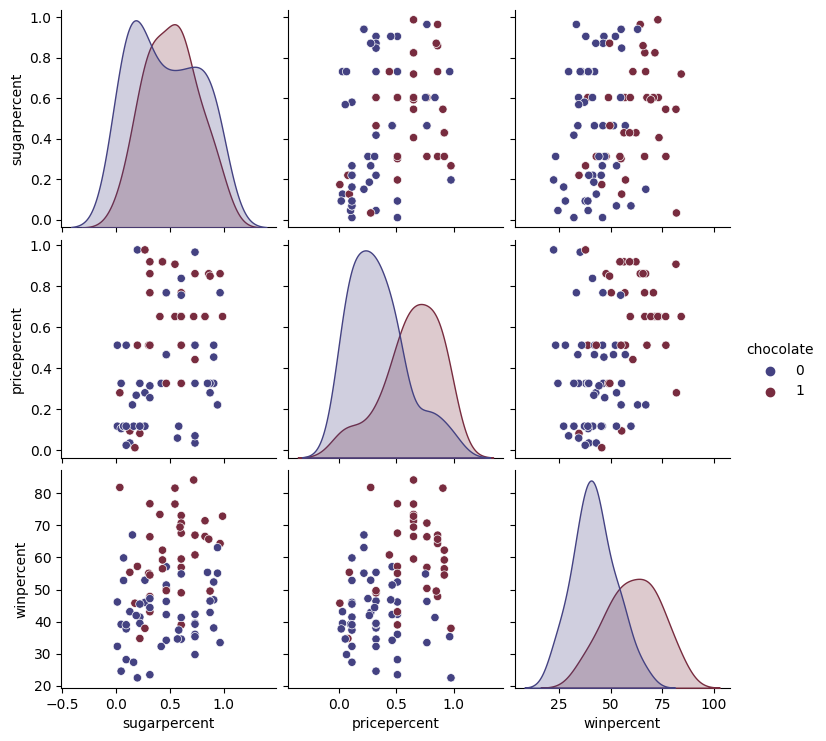

In [3]:
columns = ['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 
           'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 
           'pricepercent', 'winpercent']


# Create a pairplot
sns.pairplot(data=df_candy, vars=['sugarpercent', 'pricepercent', 'winpercent'], 
             hue='chocolate', diag_kind='kde', palette='icefire')

# Show the plot
plt.show()

<a id="section-three"></a>
## Additional Analysis

🕸️🕸️🕸️

Here is a compairison between sugar percentage and price percentage.  

I have transformed the data by selecting the values I wanted to compare and then using the means, convert from wide to long so that we can gropu and compare the percentages. 

🕷️🕷️🕷️

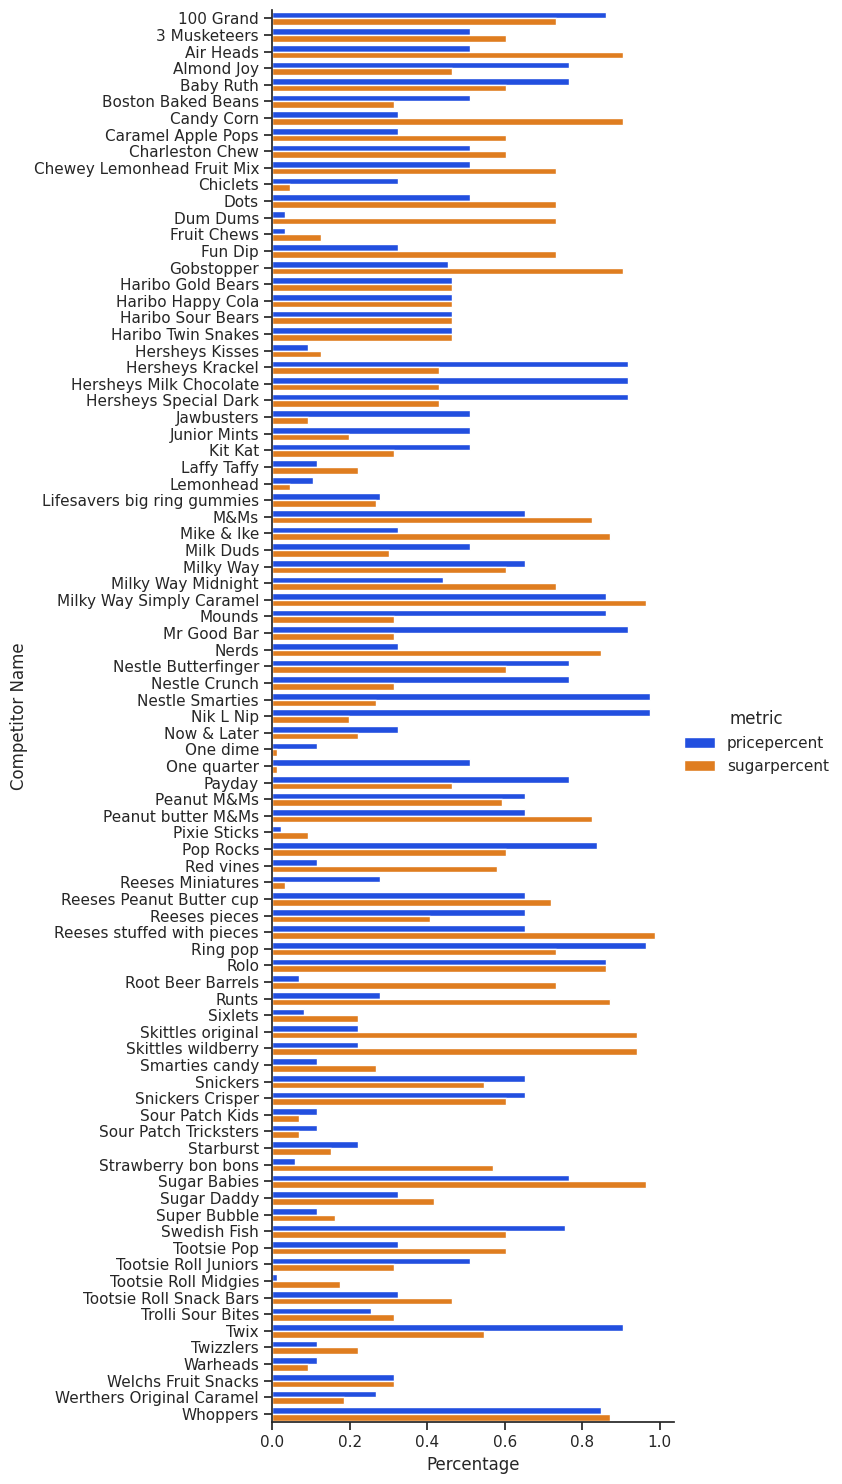

In [4]:
sns.set_theme(style="ticks", palette="bright")

#reshape the data,selecting the three variables and calculate the mean 
df_mean = df_candy.groupby('competitorname')[['pricepercent', 'sugarpercent']].mean().reset_index()

#convert from wide to long, so that we are able to group and compare the perecentages
df_mean_melt = pd.melt(df_mean, id_vars='competitorname', var_name='metric', value_name='value')

# plot the data
g = sns.catplot(x="value", y="competitorname", hue="metric", kind="bar", data=df_mean_melt, height=15, aspect=0.5)

g.set_xlabels("Percentage")
g.set_ylabels("Competitor Name")
plt.show()

<a id="section-four"></a>
## Which type of candy has higher sugar content? 

Which type of candy has higher sugar content?  

With another re-shaping application, chocolate and non-chocolate candies are grouped together(especially helpful with the binary values) and the distribution of sugar content is illustrated for chocolate-based and non-chocolate-based candies. 

In this analysis we see that the sugar percentage is higher in chocolate candy vs non-chocolate candy.
💀💀💀

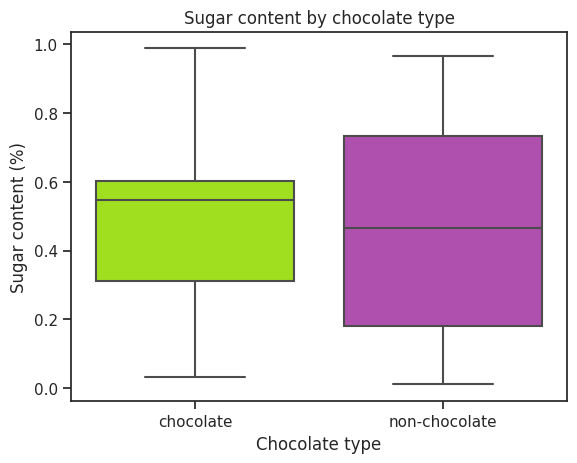

In [5]:
# Set custom colors
colors = ['#AAFF00', '#BF40BF']

# Create a new column indicating whether each candy is chocolate-based or not
df_candy['is_chocolate'] = df_candy['chocolate'].apply(lambda x: 'chocolate' if x == 1 else 'non-chocolate')

# Create a box plot to show the distribution of sugar content for chocolate-based vs. non-chocolate-based candies
sns.boxplot(x='is_chocolate', y='sugarpercent', data=df_candy, palette=colors)
plt.title('Sugar content by chocolate type')
plt.xlabel('Chocolate type')
plt.ylabel('Sugar content (%)')
plt.show()

<a id="section-five"></a>
## Welcome to Flavor Town!

So how do the flavors all add up? 

Spefically when we look at two of the flavors in this dataset, can we see how many candies use the same flavor profile? 

Again, another data transformation is needed.  We must exclude the form of the candy, along with some of the measure present in the dataset. 

I have also updated the mask parameter to remove some of the redundant information. 

Overall, the visualization shows there were many fruity candies in the internet poll. 🕯️🕯️🕯️

⚰️⚰️⚰️

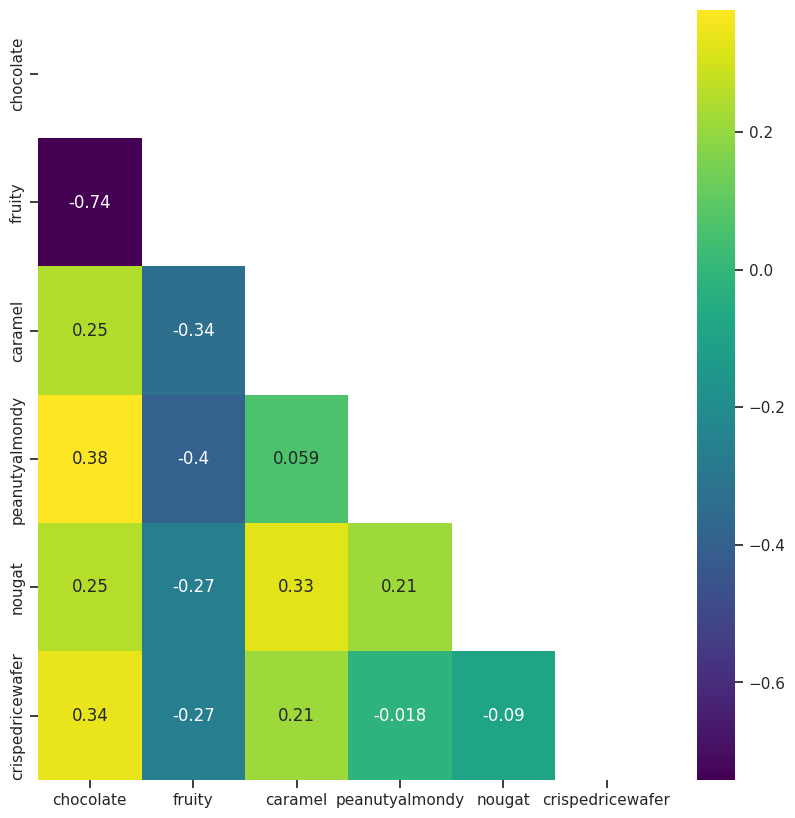

In [6]:
#I only want to look at candy flavors, so I need to exclude a few values from the df.
exclude_cols = ['winpercent', 'sugarpercent', 'pricepercent', 'bar','hard', 'pluribus']

#create a new df
corr_df = df_candy.drop(exclude_cols, axis=1)

correlation_matrix = corr_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10,10))
#set the mask parameter to true so that I can remove redundant information
sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis', mask=np.triu(correlation_matrix), ax=ax)
plt.show()

<a id="section-six"></a>
## What are the top 10 Halloween candies? 

And last, but not least...who won the Halloween candy power ranking? 

Sometimes the simple questions are the most important when exploring a dataset.

All of the top 10 competitors contained a form of chocolate, but the overall winner was....

Reeses Peanut Butter Cup!!! 🎃👻🦇

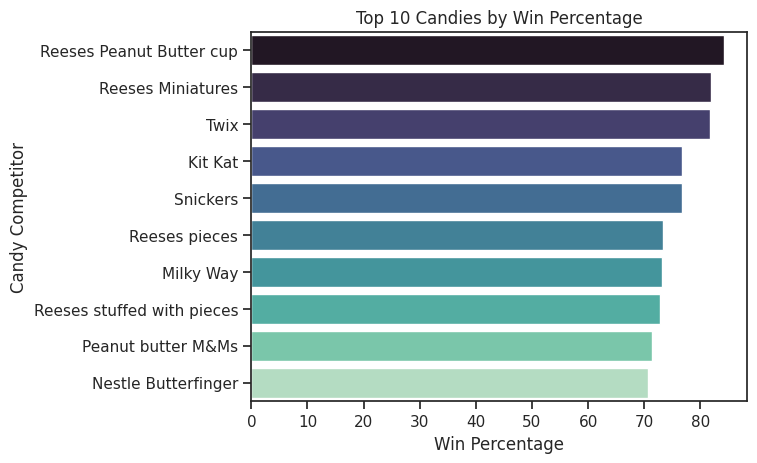

In [7]:
top_candies = df_candy.sort_values('winpercent', ascending = False).head(10)
#need to pass in palette as an arugment and create a palette with the same length as the df
palette= sns.color_palette("mako", len(top_candies))
sns.barplot(x='winpercent', y='competitorname', data=top_candies, palette=palette)

plt.xlabel('Win Percentage')
plt.ylabel('Candy Competitor')
plt.title('Top 10 Candies by Win Percentage')

plt.show()